In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
data = {'x':[1,2,2,3,4,4,4,5,5,6,7,7,8,8,9,9,10,12,12,14,14,15,16,16,16,17,18,18,19,19,20,23,23,24,25],
        'y':[1,3,2,3,3,4,3,7,6,8,7,4,7,5,8,8,9,7,8,6,9,10,11,10,9,11,10,11,11,10,11,10,12,11,12]}

df = pd.DataFrame(data)

<AxesSubplot:xlabel='x', ylabel='y'>

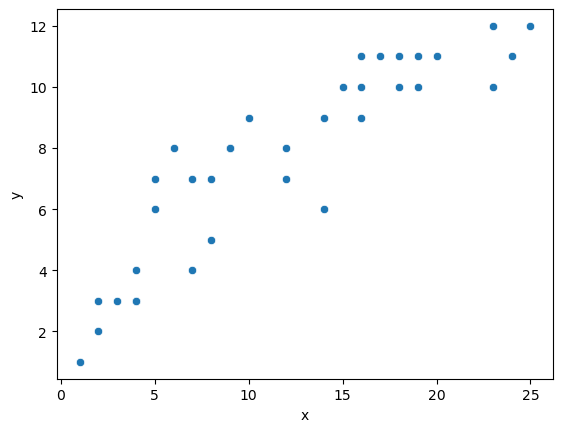

In [3]:
sns.scatterplot(data=df, x='x', y='y')

In [4]:
#LINEAR REGRESSION

#equasion: y = mx+b

mRange = [0.5,2]
mIncrement = 0.01
bRange = [-3,3]
bIncrement = 0.01

def trainLinear(df):
    rmseNums = {'rmse':[], 'm':[], 'b':[]}
    rmseNums = pd.DataFrame(rmseNums)
    
    numToRun = (mRange[1] - mRange[0])/mIncrement
    numRan = 0
    m = mRange[0]
    while m <= mRange[1]:
        print(str(0) + "% done")
        b = bRange[0]
        while b <= bRange[1]:
            sqResid = []
            for i in range(len(df)):
                actual = df.loc[i, 'y']
                estimate = m * df.loc[i, 'x'] + b
                sqResid.append((actual - estimate)**2)    
            rmse = (sum(sqResid)/len(sqResid))**0.5
            locDF = {'rmse': [rmse], 'm': [m], 'b':[b]}
            locDF = pd.DataFrame(locDF)
            rmseNums = pd.concat([rmseNums, locDF], ignore_index=True)
            b += bIncrement    
        m += mIncrement
        numRan += 1
        percentDone = round((numRan/numToRun)*100,2)
        clear_output(wait=True)
        print(str(percentDone) + "% done")
    return rmseNums.loc[rmseNums['rmse'].idxmin()]
    

In [5]:
#POLYNOMIAL REGRESSION

#equasion: y = a*(x-h)^0.5 +k

aRange = [0.5,2]
aIncrement = 0.125
hRange = [0,3]
hIncrement = 0.125
kRange = [-3,3]
kIncrement = 0.125

def trainPolynomial(df):
    rmseNums = {'rmse':[], 'a':[], 'h':[], 'k':[]}
    rmseNums = pd.DataFrame(rmseNums)
    
    numToRun = (aRange[1] - aRange[0])/mIncrement
    numRan = 0
    a = aRange[0]
    while a <= aRange[1]:
        print(str(0) + "% done")
        h = hRange[0]
        while h <= hRange[1]:
            k = kRange[0]
            while k <= kRange[1]:
                sqResid = []
                for i in range(len(df)):
                    actual = df.loc[i, 'y']
                    estimate = a * ((df.loc[i, 'x'] - h)**0.5) + k
                    sqResid.append((actual - estimate)**2)    
                rmse = (sum(sqResid)/len(sqResid))**0.5
                locDF = {'rmse': [rmse], 'a':[a], 'h':[h], 'k':[k]}
                locDF = pd.DataFrame(locDF)
                rmseNums = pd.concat([rmseNums, locDF], ignore_index=True)
                k += kIncrement
            h += hIncrement    
        a += aIncrement
        numRan += 1
        percentDone = round((numRan/numToRun)*100,2)
        clear_output(wait=True)
        print(str(percentDone) + "% done")
    return rmseNums.loc[rmseNums['rmse'].idxmin()]
    

In [6]:
trainLinear(df)

100.0% done


rmse    1.526902
m       0.500000
b       1.700000
Name: 470, dtype: float64

In [7]:
trainPolynomial(df)

8.67% done


rmse    1.246086
a       2.000000
h       1.000000
k       1.500000
Name: 15128, dtype: float64